__<span style="font-size: 40px;">Telecommunications Analysis</span>__   

---

__<font size="6">1. Business Understanding</font>__   

***<span style="font-size: 24px;">1.1 Overview</span>***

SyriaTel is a telecommunication company that specializes in the provision of data and voice services. Like its competitors, the company’s overarching goal is profit maximization. However, one of the major challenges it faces is customer churn, which occurs when subscribers cancel their services and switch to competitors. This project seeks to address that challenge through data-driven methods.  

---

***<span style="font-size: 24px;">1.2 Problem Statement</span>*** 

SyriaTel is losing a significant amount of revenue because many customers are canceling their services. At present, the company does not have a reliable system to predict which customers are most likely to leave. Without such a system, it is difficult to intervene in time to retain customers, which ultimately leads to reduced profits and loss of market share.  

---

***<span style="font-size: 24px;">1.3 Business Objective</span>*** 

The main business objective is to reduce customer churn by predicting which customers are at risk of leaving. Achieving this will allow SyriaTel to take timely action and improve customer retention.  

---

***<span style="font-size: 24px;">1.4 Project Objectives</span>***   

**Main Objective**  
The main objective of this project is to develop a machine learning classifier that can accurately predict whether a SyriaTel customer is likely to churn.  

**Specific Objectives**  
The specific objectives of the project are:  
1. To analyze customer attributes and usage patterns in order to identify the key drivers of churn.  
2. To develop, train, and evaluate predictive models that classify customers as churners or non-churners.  
3. To generate actionable business insights and recommendations, based on the model outputs, that can support strategies to reduce customer churn.  

---

***<span style="font-size: 24px;">1.5 Research Questions</span>***   

The project is guided by the following research questions:  
1. What characteristics are most strongly associated with customers who churn?  
2. Which machine learning algorithm provides the best predictive performance for churn classification?  
3. How can the insights from the churn model be applied to design effective customer retention strategies?  

---

***<span style="font-size: 24px;">1.6 Success Criteria</span>***    

The success of this project will be assessed in three ways. First, it should generate actionable insights that SyriaTel can use to reduce churn rates in the future. Second, the predictive model should achieve acceptable levels of performance, with high accuracy and a strong ability to correctly identify customers who are likely to leave. Finally, the results should be presented in a way that is clear and interpretable, so that they can be easily understood and applied by business managers and decision-makers.  

---


__<font size="6">2. Data Understanding</font>__  

The dataset used in this project is the Churn in Telecoms dataset obtained from Kaggle. It contains customer account and usage information for a telecommunications company.  

The dataset does not specify the time frame; it is a cross-sectional snapshot of customer behavior.  

It consists of 3,333 rows and 21 columns.  

The target variable is churn. This is a binary variable that indicates whether a customer has churned (True) or not (False). Since the target is categorical, it will be encoded during data preparation to allow machine learning models to process it.  


---

__<font size="6">3. Data Preparation</font>__ 

In this section the Syria Tel dataset is prepared for analysis by cleaning, transforming and standardizing the data. The goal is to ensure accuracy, handle missing values, and make the dataset ready for further exploration and modeling.

---
***<span style="font-size: 24px;">3.1 Importing Relevant Libraries</span>***

We import pandas for data manipulation, Numpy for numerical operations, seaborn and matplotlib for visualizations of patterns and trends.






In [49]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

***<span style="font-size: 24px;">3.2 Loading the Data</span>***

Load the already unzipped csv file to a dataframe called Syriatel_data for analysis.

In [50]:
#loading the data
Syriatel_data=pd.read_csv('bigml_59c28831336c6604c800002a.csv')

#the first 5
Syriatel_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [51]:
#familiarizing with our data set
Syriatel_data.shape

(3333, 21)

---

***<span style="font-size: 24px;">3.3 Data Inspection</span>***

In this step, we preview the dataset to understand its structure, identify missing values, detect duplicates, and check data types. This helps ensure the data is ready for cleaning and preparation.

In [52]:
#checking the data types.
Syriatel_data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [53]:
Syriatel_data['area code'].unique()

array([415, 408, 510], dtype=int64)

In [54]:
#changing area code data type to object rather than int becaue it is categorical.
Syriatel_data['area code']= Syriatel_data['area code'].astype ('object')

In [55]:
#previewing the data
Syriatel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [56]:
# Automatically select numerical columns
numerical_cols = Syriatel_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [57]:
Syriatel_data.describe() #for statistical summary statistics.

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


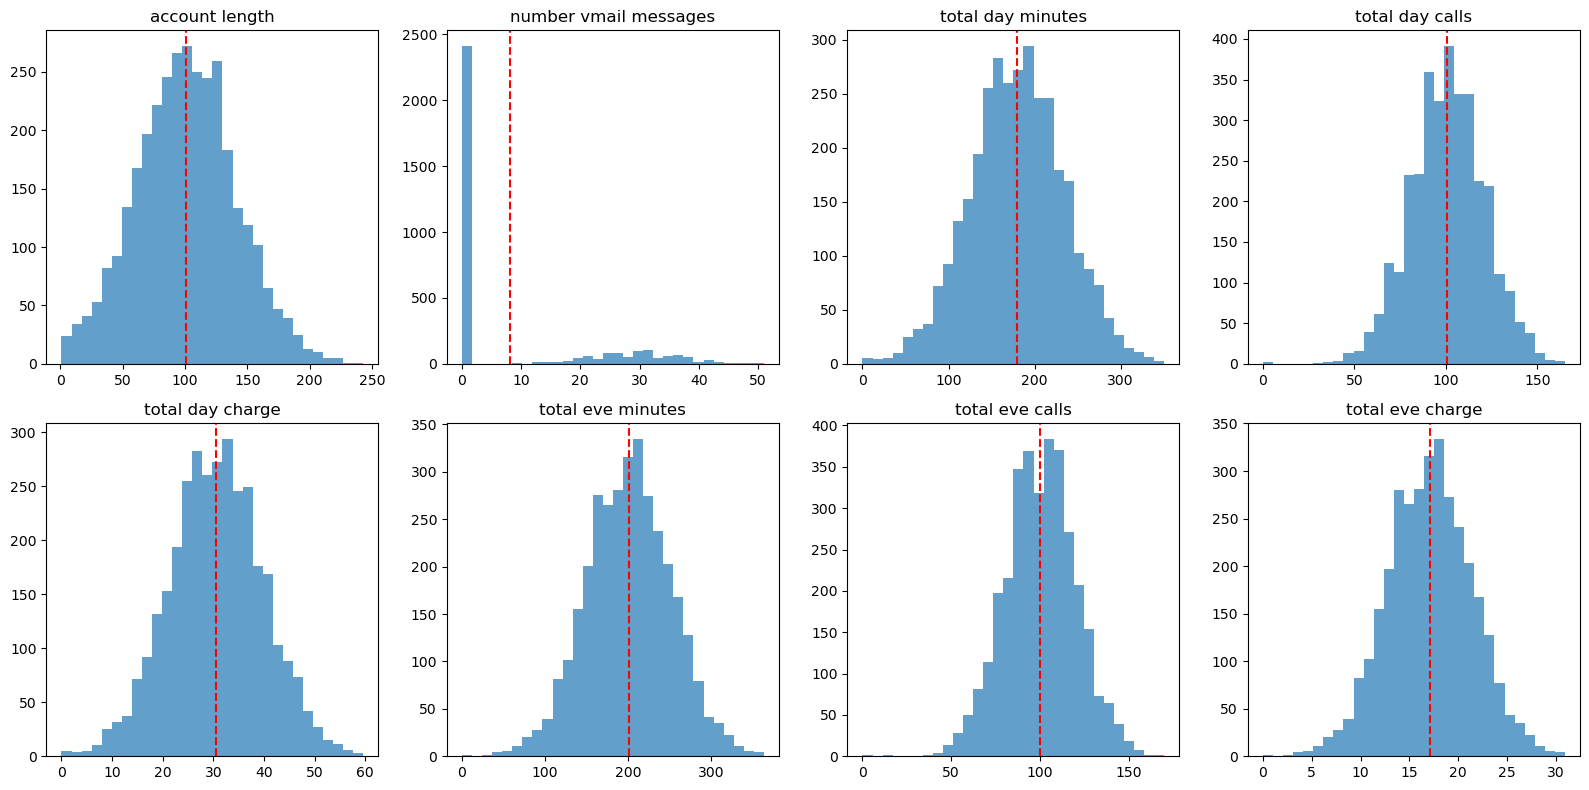

In [58]:
# Create plots to visualize outliers

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

# Plot histograms
for i, col in enumerate(numerical_cols[:8]):  # First 8 columns
    axes[i].hist(Syriatel_data[col], bins=30, alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].axvline(Syriatel_data[col].mean(), color='red', linestyle='--', label='Mean')

# Hide empty subplots if there are fewer than 8 columns
for i in range(len(numerical_cols[:8]), 8):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [59]:
#checking for missing values
Syriatel_data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [60]:
#checking for duplicates
Syriatel_data.duplicated().sum()

0

---

__<font size="6">4. Data Analysis</font>__ 

***<span style="font-size: 24px;">4.1 Cleaning The Data</span>***


In [61]:
#dropping the phone number column since it is irrelevant.
Syriatel_data=Syriatel_data.drop('phone number',axis=1)
Syriatel_data.head(10)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


During the data inspection and cleaning it was found out that the Syria Tel data set contained no missing values, no duplicates.

The area code column was converted to object since it is a categorical variable.

The phone number column was dropped because it acts as an identifier and does not affect whether a customer churns.

In [62]:
#saving the cleaned data set
Syriatel_data.to_csv('Syriatel_cleaned.csv', index=False)

---

***<span style="font-size: 24px;">4.2 Adding Calculated Columns</span>***

*<span style="font-size: 20px;">4.2.1. Total Individual charges Column</span>*

The total individual charges column helps us quickly see and compare earnings among different people in a day and use that information to do our  analysis and predictions.

In [63]:
# total_individual_charge = total_day_charge + total_eve_charge + total_night_charge + total_intl_charge
Syriatel_data['total_individual_charges'] = (Syriatel_data['total day charge'] + 
                                            Syriatel_data['total eve charge'] + 
                                            Syriatel_data['total night charge']+
                                            Syriatel_data['total intl charge'])

In [64]:
#Calculating Total revenue made in a day
total_revenue= Syriatel_data['total_individual_charges'].sum()
total_revenue

198146.03

The revenue the SyriaTel telecommunication company makes in a day is 198146.03

*<span style="font-size: 20px;">4.2.2. Total Individual Minutes Column</span>*

The total_individual_minutes column helps you see how much customers use their phones, spot patterns linked to churn and make analysis easier by combining all call times into one number.

In [65]:
# Sum of all time periods
# total_individual_minutes = total_day_minutes + total_eve_minutes + total_night_minutes + total_intl_minutes
Syriatel_data['total_individual_minutes'] = (Syriatel_data['total day minutes'] + 
                                             Syriatel_data['total eve minutes'] + 
                                             Syriatel_data['total night minutes'] + 
                                             Syriatel_data['total intl minutes'])

In [66]:
total_minutes= Syriatel_data['total_individual_minutes'].sum()
total_minutes

1972685.3

The total minutes used in a day is 1972685.3 minutes 

*<span style="font-size: 20px;">4.2.3. Average Cost Per Minute Column</span>*

Shows how much each minute of usage costs on average. It is useful for identifying high-cost users and evaluating pricing efficiency or profitability.

In [67]:
# Calculated using:
# avg_cost_per_minute = sum of (total_day_charge + total_eve_charge + total_night_charge + total_intl_charge) / sum of (total_individual_minutes)
avg_cost_per_minute = total_revenue/  total_minutes
avg_cost_per_minute


0.10044482513252367

The Company is making profit since using the average cost per minute and getting the amount paid by the first customer with 265 total day minutes, the person should pay a charge of 26.617 but the company is charging 45.07.

*<span style="font-size: 20px;">4.2.4. Total Individual Calls Column</span>*

Sums all types of calls to measure total interaction. It is helpful for understanding customer behavior and workload.

In [68]:
# 
Syriatel_data['total_individual_calls'] = (Syriatel_data['total day calls'] + 
                                           Syriatel_data['total eve calls'] + 
                                           Syriatel_data['total night calls'] + 
                                           Syriatel_data['total intl calls'])

*<span style="font-size: 20px;">4.2.5. Charges Per Call Column</span>*

This is how much one is charged  per call. It is useful for assessing call value and identifying whether certain customers or call types are more profitable.

In [69]:
# 5. Revenue Per Call
Syriatel_data['charge_per_call'] =  Syriatel_data['total day charge'] / Syriatel_data['total day calls']

In [70]:
Syriatel_data.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'total_individual_charges', 'total_individual_minutes',
       'total_individual_calls', 'charge_per_call'],
      dtype='object')

In [71]:
Syriatel_data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_individual_charges,total_individual_minutes,total_individual_calls,charge_per_call
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,11.01,10.0,3,2.70,1,False,75.56,717.2,303,0.409727
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,11.45,13.7,3,3.70,1,False,59.24,625.2,332,0.223333
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,7.32,12.2,5,3.29,0,False,62.29,539.4,333,0.362982
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,8.86,6.6,7,1.78,2,False,66.80,564.8,255,0.716901
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,8.41,10.1,3,2.73,3,False,52.09,512.0,359,0.250796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,...,12.56,9.9,6,2.67,2,False,60.10,660.7,292,0.344805
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,...,8.61,9.6,4,2.59,3,False,63.53,585.4,239,0.689298
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,...,8.64,14.1,6,3.81,2,False,67.74,675.6,264,0.282018
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,...,6.26,5.0,10,1.35,2,False,57.53,517.6,336,0.346190


***<span style="font-size: 24px;">4.3 Visuals</span>***

*<span style="font-size: 20px;">4.3.1 Top 10 States by Churn</span>*

This visualization shows where customer loss is highest to focus on improving retention in those areas.

In [72]:
Syriatel_data['churn']= Syriatel_data['churn'].astype(int)

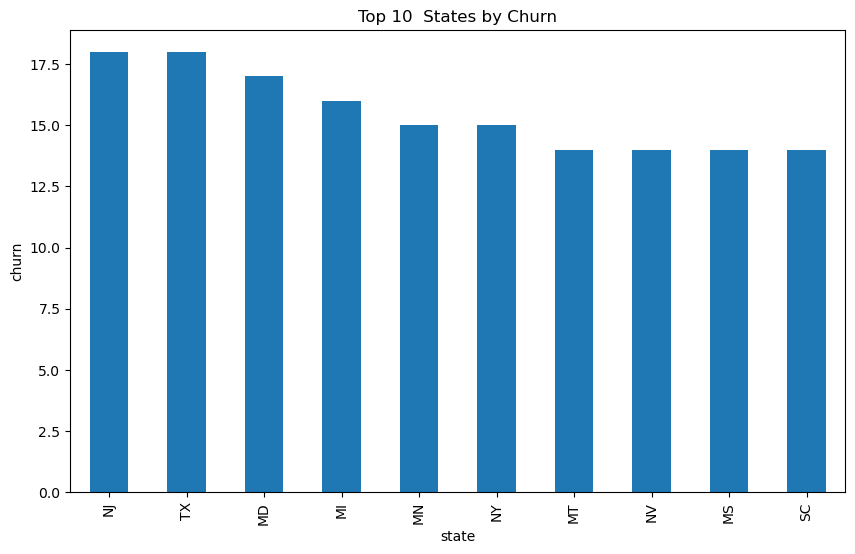

In [73]:
Syriatel_data.groupby(['state'])['churn'].sum().sort_values(ascending=False).head(10).plot(kind = 'bar',figsize = (10,6))
plt.title('Top 10  States by Churn')
plt.xlabel('state')
plt.ylabel('churn')
plt.show();

## Observation
* The state with the highest amount of churns is New jersey.

## States with the Largest amount of charges

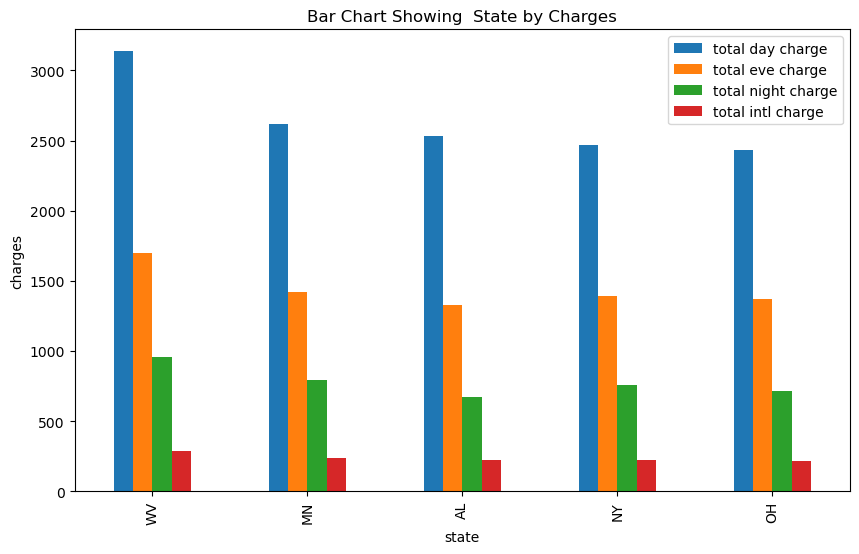

In [74]:
Syriatel_data.groupby(['state'])[['total day charge','total eve charge','total night charge','total intl charge']].sum().sort_values(by='total day charge',ascending=False).head(5).plot(kind = 'bar',figsize = (10,6))
plt.title('Bar Chart Showing  State by Charges')
plt.xlabel('state')
plt.ylabel('charges')
plt.show();

These are the top 5 states with the largest amount of charges.

A customer can churn due to the pricing of the charges in different states.

## Observation
* The state with the largest amount of charges is West Virginia(WV) with charges of over 3000 for total day charge, over 1500 for total evening charge, close to 1000 for total evening charge and about 250 for total international charges.
* Other states with the largest amount of charges include Minnesota, Alabama, NewYork and Ohio

## Interpretation
* Some states may have a higher price for the packages offered by SyriaTel causing some of the customers to churn.

*<span style="font-size: 20px;">4.3.2 Percentage of Churn</span>*

What is the percentage of those customers who churn in relation to those who do not?

This plot provides a quick overview of customer churn. It helps determine whether churn is a significant issue, laying the groundwork for deeper analysis and revealing potential revenue risks that may require focused retention efforts.

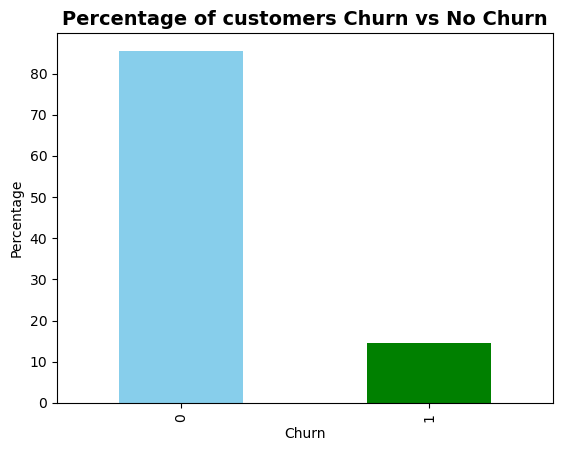

In [75]:
# #convert the dtype in the column churn,this converts False=o and True =1
# Syriatel_data['churn']= Syriatel_data['churn'].astype('int')
churn_percentages= Syriatel_data['churn'].value_counts(normalize=True)*100 
#plotting
churn_percentages.plot(kind='bar', color=['skyblue','green'])
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.title('Percentage of customers Churn vs No Churn', fontsize=14, fontweight='bold')
plt.show();

*<span style="font-size: 20px;">4.3.3 Revenue per call vs Total revenue</span>*

This plot reveals how revenue per call relates to total revenue. It uncovers churn patterns across spending levels and supports retention strategies by identifying potential dissatisfaction among low-revenue customers.

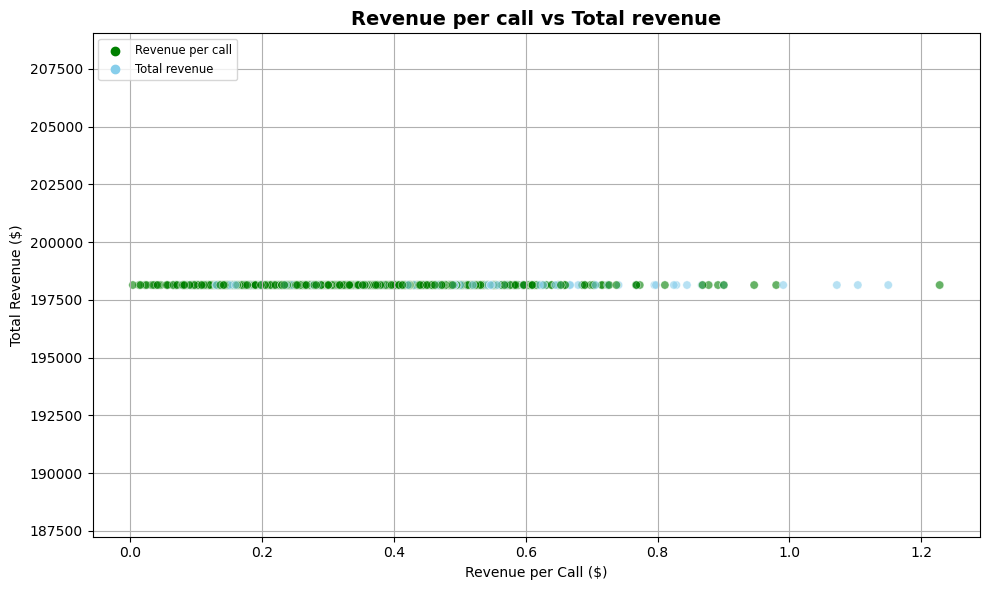

In [76]:
# Plot size
plt.figure(figsize=(10, 6))

# color palete
custom_palette = {0: 'green', 1: 'skyblue'}

# Type of plot
sns.scatterplot(data=Syriatel_data, x='charge_per_call', y= total_revenue, 
                hue='churn', palette=custom_palette, alpha=0.6)

# Plotting the axes
plt.xlabel('Revenue per Call ($)')
plt.ylabel('Total Revenue ($)')
plt.title('Revenue per call vs Total revenue', fontsize=14, fontweight='bold')

# Legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Revenue per call', 'Total revenue'],
           loc='upper left', fontsize='small')

plt.grid(True)
plt.tight_layout()
plt.show()

*<span style="font-size: 20px;">4.3.4 Customer Data Correlation</span>*

This plot helps identify closely related variables for modeling. It uncovers hidden relationships like usage patterns and plan effects on churn and detect unusual correlations that may signal data quality issues.

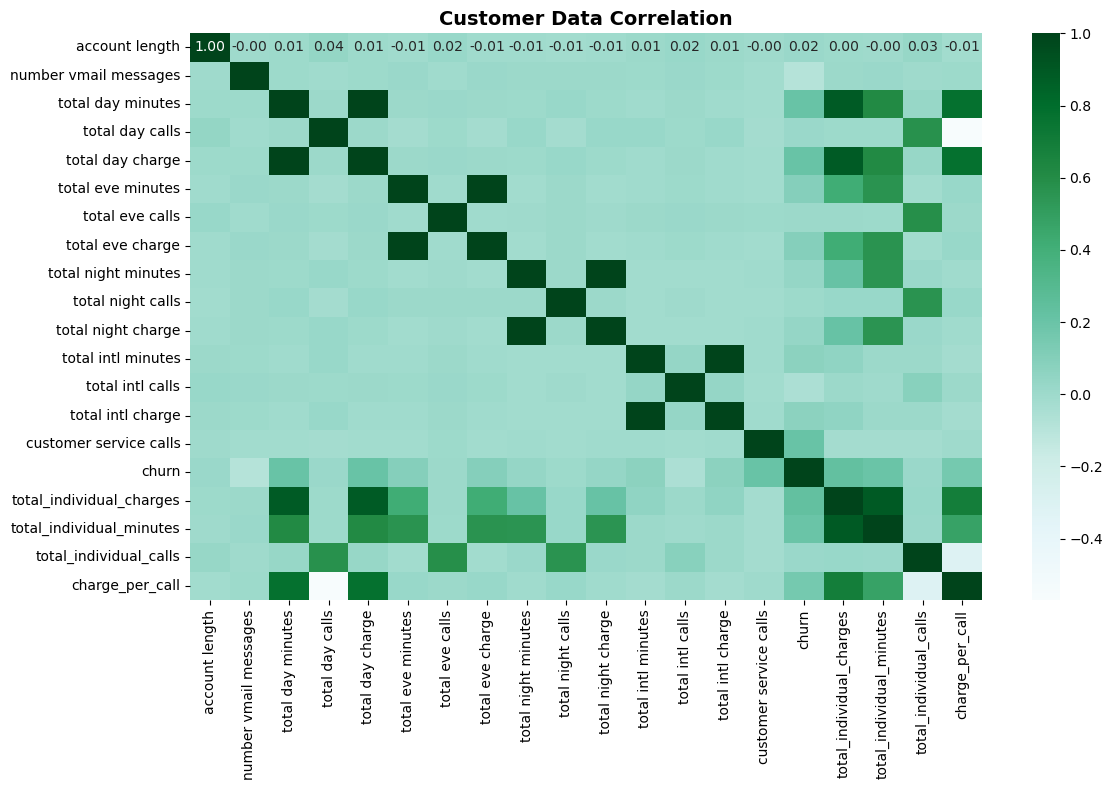

In [77]:
plt.figure(figsize=(12, 8))
corr = Syriatel_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='BuGn', fmt=".2f")  
plt.title('Customer Data Correlation', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

*<span style="font-size: 20px;">4.3.5 Total Minutes Usage by Churn Status</span>*

This plot helps visualize how much time customers spend on calls and whether usage patterns differ between those who churned and those who stayed. It reveals whether high or low call activity correlates with churn, offering insights into customer engagement and potential dissatisfaction.

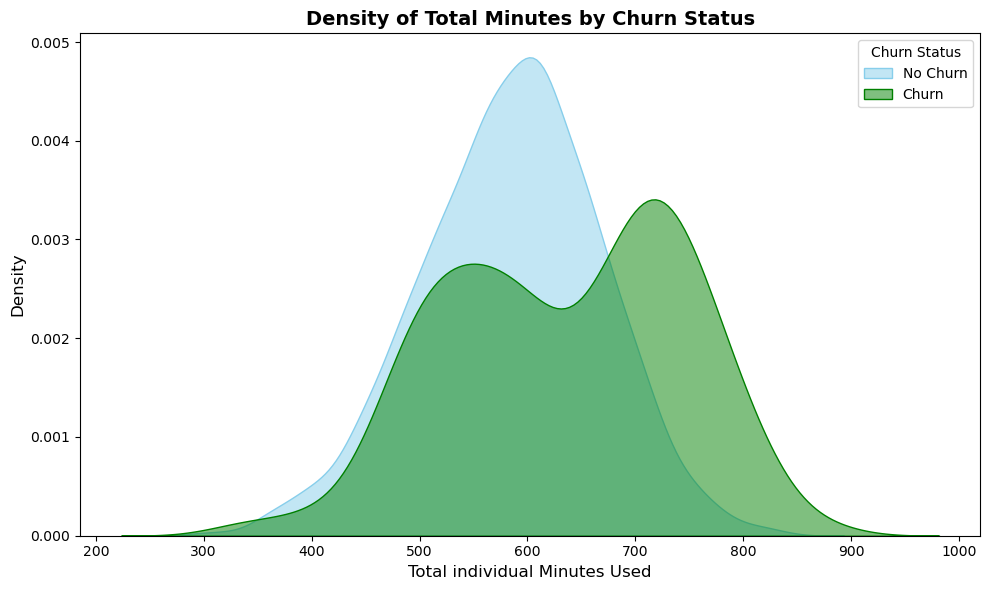

In [78]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

plt.figure(figsize=(10, 6))

sns.kdeplot(data=Syriatel_data[Syriatel_data['churn'] == 0]['total_individual_minutes'], label='No Churn',
            color='skyblue', fill=True, alpha=0.5)
sns.kdeplot(data=Syriatel_data[Syriatel_data['churn'] == 1]['total_individual_minutes'], label='Churn',
            color='green', fill=True, alpha=0.5)

plt.title('Density of Total Minutes by Churn Status', fontsize=14, fontweight='bold')
plt.xlabel('Total individual Minutes Used', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Churn Status')

plt.tight_layout()
plt.show();


---

***<span style="font-size: 24px;">5.0 Data Modeling</span>***


In this part we will fit a logistic Regression Model  and Decision Tree Classifier

## Importing necessary libraries

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ( accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, roc_curve, confusion_matrix)
from sklearn import tree

*<span style="font-size: 20px;">5.1.1 Preparing data forModeling</span>*

In [80]:
Syriatel_data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_individual_charges,total_individual_minutes,total_individual_calls,charge_per_call
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,11.01,10.0,3,2.70,1,0,75.56,717.2,303,0.409727
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,11.45,13.7,3,3.70,1,0,59.24,625.2,332,0.223333
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,7.32,12.2,5,3.29,0,0,62.29,539.4,333,0.362982
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,8.86,6.6,7,1.78,2,0,66.80,564.8,255,0.716901
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,8.41,10.1,3,2.73,3,0,52.09,512.0,359,0.250796


We identify the categorical columns which include: International plan, area code, Voice mail plan and our target variable churn

We've to convert the categorical variables to numeric datatypes

We will use the get_dummies() function to convert object and category datatypes to dummy variables

In [81]:
# convert categorical variables to numeric  datatype

x_cat_features=['international plan', 'voice mail plan','area code']
X_cat= pd.get_dummies(Syriatel_data[x_cat_features], drop_first =True, dtype= float)
#The drop_first=True argument removes the first level for each categorical variable 
#the dtype=float argument converts the datatype of all the dummy variables to float




In [82]:
X_cat

,international plan_yes,voice mail plan_yes,area code_415,area code_510
0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
3328,0.0,1.0,1.0,0.0
3329,0.0,0.0,1.0,0.0
3330,0.0,0.0,0.0,1.0
3331,1.0,0.0,0.0,1.0


The drop True argument removes the first level for each categorical variable.

## Interpretation
* (1,0)- represents area code 415.
* (0,1)- represents area code 510
* (0,0)- represents area code 408

In [83]:
#our target variable is numeric 
y=Syriatel_data['churn']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int32

In [84]:
Syriatel_data.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'total_individual_charges', 'total_individual_minutes',
       'total_individual_calls', 'charge_per_call'],
      dtype='object')

In [85]:
X= pd.get_dummies(Syriatel_data.drop(columns=['churn','state','total_individual_charges', 'total_individual_minutes','total_individual_calls', 'charge_per_call']), drop_first=True, dtype=float)
X .head()   
# we have dropped the target variable, state and the other columns which have a  high correlation with each other
                  

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,area code_415,area code_510,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1.0,0.0,0.0,1.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1.0,0.0,0.0,1.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1.0,0.0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0,0.0,1.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1.0,0.0,1.0,0.0


*<span style="font-size: 20px;">5.1.2 Performing a train test split </span>*

In [86]:

X_train,X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state=42, stratify= y)
#stratify= y -to keep the classes in churn balanced for X_train and y_train

# standardizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [87]:
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (2333, 19) Test shape: (1000, 19)


Train two simple models
* Model 1: Logistic Regression which is easy and gives probabilities .
* Model 2: Decision Tree which is easy to explain.

*<span style="font-size: 20px;">5.1.3 Fitting a logistic model  </span>*

In [88]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]  # probability of churn
#the y_pred_proba gives us the probability of the true churns only
log_model



LogisticRegression(max_iter=1000, random_state=42)

*<span style="font-size: 20px;">5.1.4 Fitting a Classifier model for Decision Tree </span>*

In [89]:
# Decision Tree
clf_model = DecisionTreeClassifier(random_state=42)
clf_model.fit(X_train, y_train)
y_pred_dt = clf_model.predict(X_test)
# decision tree probabilities (for ROC/AUC)
y_proba_dt = clf_model.predict_proba(X_test)[:, 1]

clf_model



DecisionTreeClassifier(random_state=42)

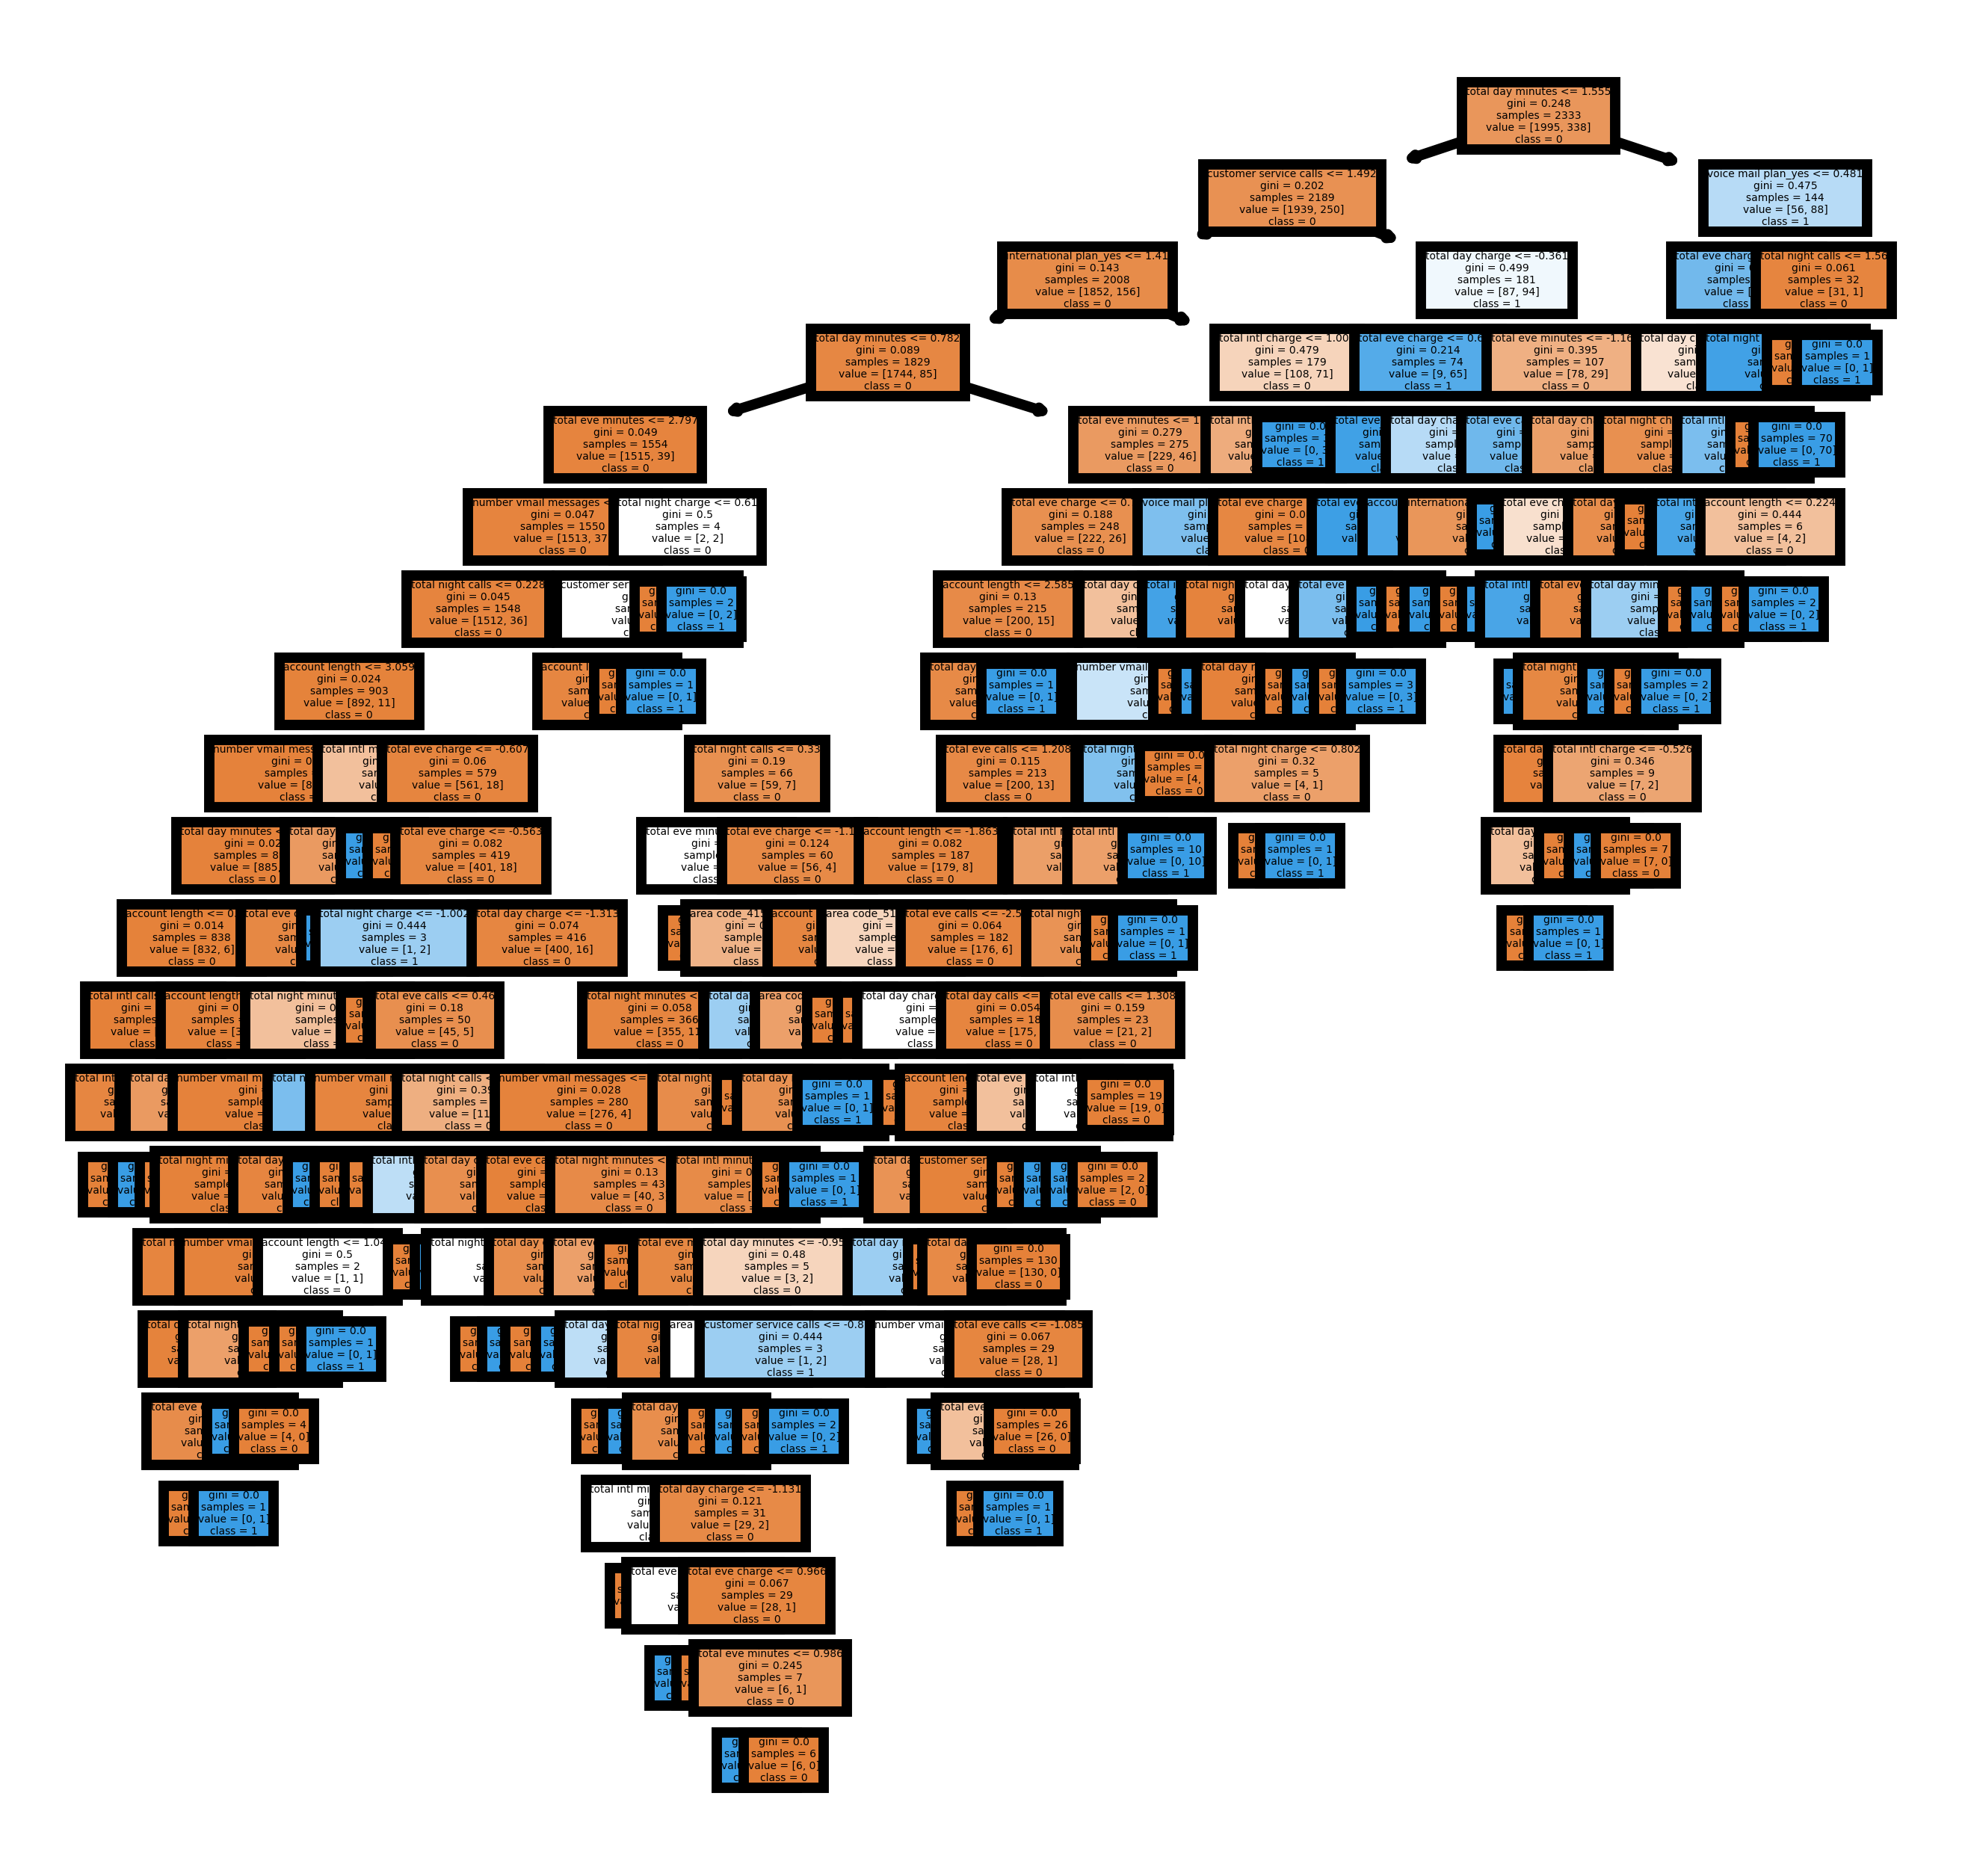

In [90]:
## plotting the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=1000)

tree.plot_tree(clf_model,
               feature_names = X.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

## Observation
* Our leaf node has a gini impurity of 0 meaning there is high purity in the final subset.

***<span style="font-size: 24px;">6.0 Model Evaluation</span>***

For this part we are going to check how the model performs using metrics such as:
*  Accuracy: how many were correct overall.
*  Precision: of those we said "will churn", how many really churned.
*  Recall: of those who really churned, how many did we find.
*  F1: balance between precision and recall.
*  AUC: how well the model ranks people from low to high risk


In [91]:
# Logistic
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log, zero_division=0)
rec_log = recall_score(y_test, y_pred_log, zero_division=0)
f1_log = f1_score(y_test, y_pred_log, zero_division=0)
auc_log = roc_auc_score(y_test, y_proba_log)

# Decision Tree
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, zero_division=0)
rec_dt = recall_score(y_test, y_pred_dt, zero_division=0)
f1_dt = f1_score(y_test, y_pred_dt, zero_division=0)
auc_dt = roc_auc_score(y_test, y_proba_dt)

# Show results in a tiny table
results = pd.DataFrame({
    'Model': ['Logistic', 'DecisionTree'],
    'Accuracy': [acc_log, acc_dt],
    'Precision': [prec_log, prec_dt],
    'Recall': [rec_log, rec_dt],
    'F1': [f1_log, f1_dt],
    'AUC': [auc_log, auc_dt]
})
results = results.round(3)
results

,Model,Accuracy,Precision,Recall,F1,AUC
0,Logistic,0.863,0.562,0.248,0.344,0.813
1,DecisionTree,0.910,0.701,0.662,0.681,0.807


## Observation
* The accuracy score is  better in the Decision Tree model with 91% compared to 86.3% in the logistic model.
* The Precision is higher in the Decision Tree model with 70.1% compared to 56.2% in the logistic model.
* The Recall is higher in the Decision tree model with 66.2% compared to 24.8% in the logistic model.
* The F1 score is stronger in the Decision Tree model with 68.1% compared to 34.4% in the logistic model.
* The logistic model is slightly better at ranking customers with 81.3% compared to 80.7% in the Decision Tree model.

*<span style="font-size: 20px;">6.1. Simple bar chart to compare Accuracy, Precision, Recall </span>*


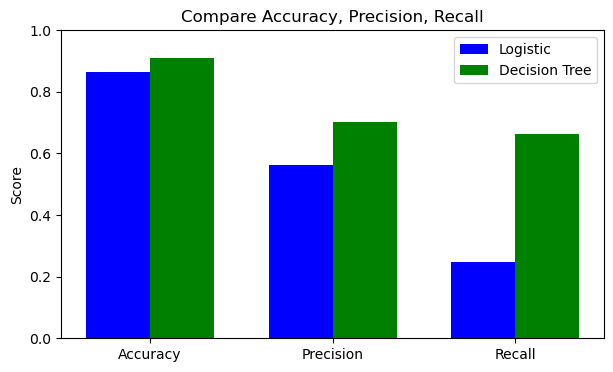

In [92]:
# List of names of scores
metrics = ['Accuracy', 'Precision', 'Recall']

# Scores for logistic model
log_vals = [acc_log, prec_log, rec_log]

# Scores for decision tree model
dt_vals  = [acc_dt, prec_dt, rec_dt]

# Make x positions for bars (0,1,2)
x = np.arange(len(metrics))

# Width of each bar
width = 0.35

# Make a drawing space (7 wide, 4 tall)
plt.figure(figsize=(7,4))

# Draw bars for logistic (a little to the left)
plt.bar(x - width/2, log_vals, width, label='Logistic', color="blue")

# Draw bars for decision tree (a little to the right)
plt.bar(x + width/2, dt_vals, width, label='Decision Tree', color="green")

# Put names (Accuracy, Precision, Recall) under bars
plt.xticks(x, metrics)

# Y-axis goes from 0 to 1 (since scores are between 0 and 1)
plt.ylim(0,1)

# Label the y-axis
plt.ylabel('Score')

# Title of the picture
plt.title('Compare Accuracy, Precision, Recall')

# Show which color is which model
plt.legend()

# Show the final picture
plt.show()

*<span style="font-size: 20px;">6.1.1 Plotting the confusion box </span>*

The confusion box shows the true values vs the predicted values.


* The Top-left represents the true no-churn predicted no-churn.
* The Bottom-right represents the true churn predicted churn

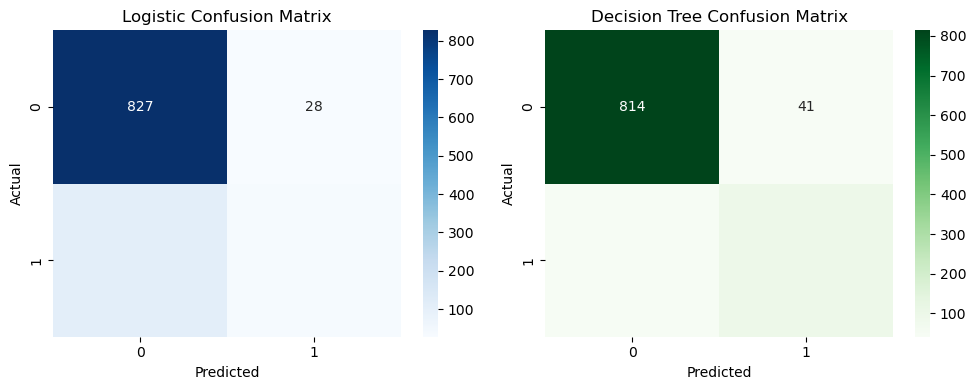

In [93]:
cm_log = confusion_matrix(y_test, y_pred_log)
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1) # making sure that the heatmaps are side by side (subplot(rows, cols, index))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

### Confusion Matrix Results:
- **Logistic Regression**
  - TN = 827, FP = 28, FN = 109, TP = 36
  - Strength: Very good at finding customers who stay.
  - Weakness: Misses many customers who actually churn (high FN).

- **Decision Tree**
  - TN = 814, FP = 41, FN = 49, TP = 96
  - Strength: Better at finding customers who churn (higher TP).
  - Weakness: Slightly more mistakes predicting churn for loyal customers (FP)

### Interpretation
* Logistic Regression is more conservative, predicting "No churn" most of the time.
* Decision Tree is more balanced, better at catching churners but slightly worse for non-churners.
* For business, **Decision Tree may be better**, because finding churners early is more important than a few false alarms.

*<span style="font-size: 20px;">6.1.2 ROC Curve </span>*

The ROC curve illustrates the true positive rate against the false positive rate of our classifier models.

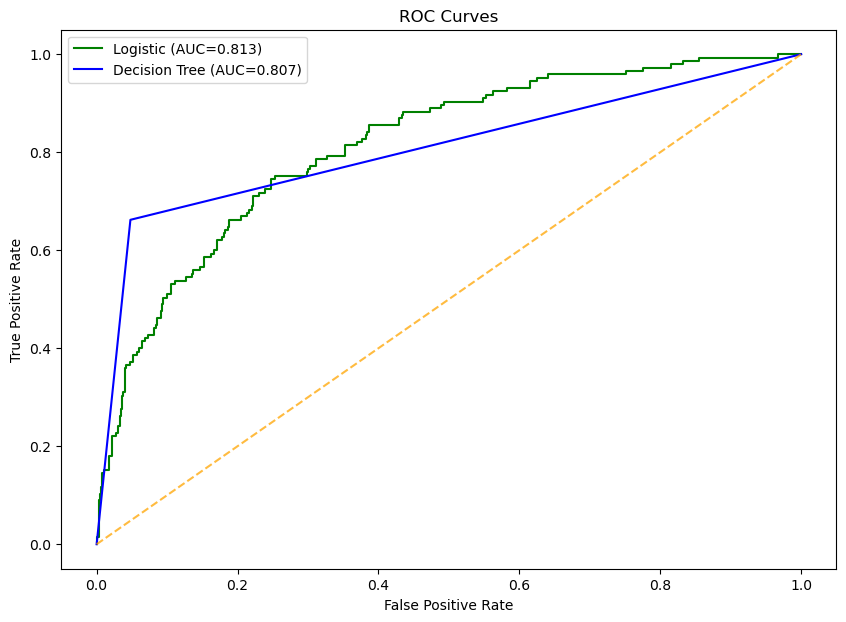

In [94]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)

plt.figure(figsize=(10,7))
plt.plot(fpr_log, tpr_log, label=f'Logistic (AUC={auc_log:.3f})', color = "green")#  make the label come with its value rounded to 3 decimal places
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC={auc_dt:.3f})', color = "blue")
plt.plot([0,1],[0,1], color = "orange",linestyle="--", alpha=0.75)# draw a line from  (0,0) to (1,1) , to check prediction vs reality
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

### ROC Curve Results and Insights  

The ROC curve helps us understand how well our models can separate customers who churn (1) from those who don’t churn (0).  

- **X-axis (False Positive Rate):** How often the model wrongly predicts churn for customers who actually stayed.  
- **Y-axis (True Positive Rate):** How often the model correctly predicts churn for customers who actually left.  

### Key Observations  
1. **Logistic Regression (green curve):**  
   - AUC = **0.813**  
   - This means Logistic Regression is good at separating churn vs. non-churn customers, with about **81% ability to rank positive cases higher than negative cases**.  
   - The curve is well above the diagonal baseline (random guessing), showing strong predictive power.  

2. **Decision Tree (blue curve):**  
   - AUC = **0.807**  
   - Very close to Logistic Regression in performance, but slightly lower.  
   - Still much better than random guessing.  

3. **Comparison:**  
   - Both models perform almost equally well in terms of AUC.  
   - Logistic Regression has a small edge in separating churners from non-churners.  


### Insights  
- Both models are useful for churn prediction, but Logistic Regression is **slightly more reliable overall**.  
- Decision Tree may capture patterns better in recall (as seen in the confusion matrix), but Logistic Regression is more stable across thresholds.  
- In a business setting, the choice may depend on whether we value **interpretability (Logistic)** or **more flexible decision rules (Tree)**.  

### Conclusion
* Logistic Regression is the stronger model when focusing on AUC and overall ranking ability, but both models are viable.

*<span style="font-size: 20px;">6.1.3 Features which matter most </span>*

* For Logistic, we will look at the biggest coefficients.
* For Decision Tree, we will look at feature importance.
* We will illustrate the top 5 features.


In [95]:
# let see feature names 
feature_names = X.columns
feature_names

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'area code_415', 'area code_510', 'international plan_yes',
       'voice mail plan_yes'],
      dtype='object')

Top 5 logistic features:
voice mail plan_yes       0.866270
customer service calls    0.691828
international plan_yes    0.592930
number vmail messages     0.454736
total intl calls          0.355355
dtype: float64


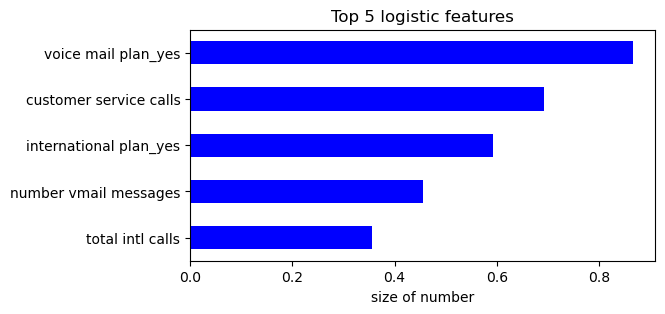


Top 5 decison tree features:
total day minutes         0.142349
customer service calls    0.116445
total day charge          0.110220
total intl calls          0.090601
total eve charge          0.082447
dtype: float64


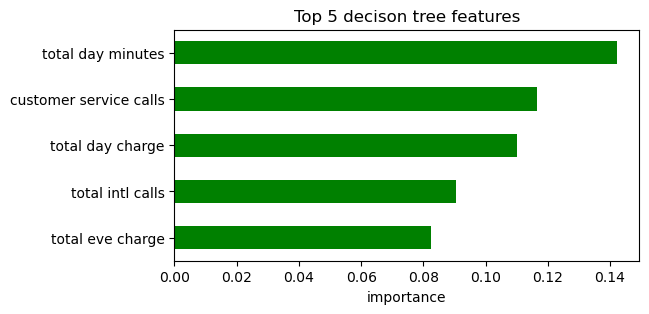

In [96]:
# logistic coefficients (numbers for each feature)
coefs = pd.Series(log_model.coef_[0], index=feature_names)

# pick top 5 biggest numbers (by abs, dont care + or -)
top5_log = coefs.abs().sort_values(ascending=False).head(5)

print("Top 5 logistic features:")
print(top5_log)

# draw a small bar graph
plt.figure(figsize=(6,3))
top5_log.sort_values().plot(kind='barh', color="blue")
plt.title('Top 5 logistic features')
plt.xlabel('size of number')
plt.show()


# decison tree importance (how much each feature matters)
importances = pd.Series(clf_model.feature_importances_, index=feature_names)

# take top 5
top5_dt = importances.sort_values(ascending=False).head(5)

print("\nTop 5 decison tree features:")
print(top5_dt)

# draw bars
plt.figure(figsize=(6,3))
top5_dt.sort_values().plot(kind='barh', color='green')
plt.title('Top 5 decison tree features')
plt.xlabel('importance')
plt.show()

##  Feature Importance Results  

### Logistic Regression  
- **Voice mail plan (yes)** is the strongest factor reducing churn.  
- **Customer service calls** strongly increase churn risk.  
- **International plan (yes)** also increases churn likelihood.  
- **Number of voicemail messages** helps reduce churn.  
- **International call count** plays a moderate role in churn prediction.  

 Logistic Regression focuses more on **plans and customer interaction patterns**.  

---

### Decision Tree  
- **Total day minutes** (usage) is the most important churn driver.  
- **Customer service calls** remain a key churn warning signal.  
- **Total day charge** has a direct effect on churn.  
- **International calls** significantly influence churn.  
- **Evening charges** also plays a role.  

Decision Tree emphasizes **usage intensity and billing impact**.  

---

###  Insights  
- **Both models agree:** customer service calls are a strong churn indicator .  
- **Different perspectives:**  
  - Logistic highlights **plans and customer service interaction**.  
  - Decision Tree highlights **usage and billing behavior**.  
- **Business impact:**  
  - Improve **customer support quality**.  
  - Revisit **international plan pricing**.  
  - Offer **loyalty rewards** for heavy users to reduce churn risk.  

*<span style="font-size: 20px;">6.1.4 Summary </span>*


###  Model Performance  
- **Decision Tree** outperformed Logistic Regression overall:  
  - Accuracy: **91%** (vs. 86% for Logistic).  
  - Recall: **66%**, meaning it captures far more churn cases than Logistic (**24%**).  
  - F1 Score: **0.68**, showing a good balance between precision and recall.  
- **ROC Curve**: Both models perform well (>0.80 AUC), with Logistic slightly better in ranking churn probabilities.

 In practice: **Decision Tree is better at finding actual churners**, while Logistic Regression is better at ranking churn probability.  

---

###  Key Drivers of Churn  
- **Customer service calls** → The strongest red flag in both models (more calls = higher churn).  
- **International plan** → Customers with this plan are much more likely to churn.  
- **Voice mail plan** → Helps reduce churn.  
- **Heavy day usage (minutes/charges)** → Strong churn driver for high-usage customers.  



*<span style="font-size: 20px;">6.1.5 Business Recommendations </span>*

1. **Improve Customer Support Quality**  
   - High service call volume is strongly tied to churn.  
   - Invest in better training, quicker resolutions, and proactive issue handling.  

2. **Reassess International Plan Pricing & Policies**  
   - International plan customers churn more.  
   - Review pricing, offer bundled discounts, or add loyalty incentives to retain them.  

3. **Retain High-Usage Customers**  
   - Heavy day-minute users are at higher risk.  
   - Create targeted retention programs (loyalty points, discounted packages, or “VIP customer” care) to reduce churn.  

###  Overall Insight  
The models show that **customer dissatisfaction (service calls), costly plans (international), and heavy usage patterns** are the main churn triggers.  
Focusing on **customer experience, fair pricing, and rewarding loyal heavy users** can significantly cut churn and boost retention.  